In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npa
import cv2

In [2]:
test_dir = '../../archive/test/'
train_dir = '../../archive/train/'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.7.0


In [5]:
model = tf.keras.Sequential()

In [5]:
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [6]:
train_data = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(32, 32),
    class_mode='binary',
    batch_size=32
)

test_data = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(32, 32),
    class_mode='binary',
    batch_size=32
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, InputLayer, Dropout, Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, Adadelta, Adagrad
from tensorflow.keras.utils import plot_model

In [8]:
model_1 = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.2),
    Conv2D(filters=40, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=30, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=25, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=512, activation='sigmoid'),
    Dropout(rate=0.2),
    Dense(units=1, activation='sigmoid')
])

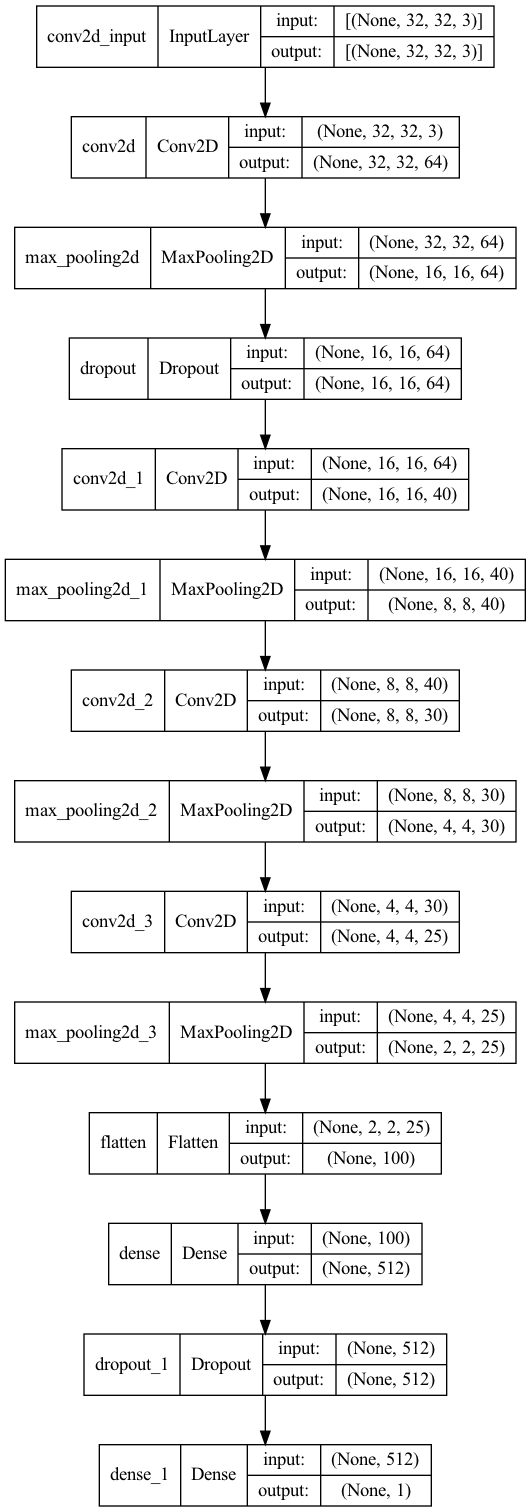

In [9]:
plot_model(model=model_1, show_shapes=True, show_layer_names=True)

In [10]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision()]
)

In [11]:
history_1 = model_1.fit(
    train_data,
    epochs=100,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    verbose=1
)

2022-02-02 10:44:30.242577: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-02-02 10:44:30.483845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.6231 - auc: 0.6685 - precision: 0.5990

2022-02-02 10:44:33.401640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


83/83 [==============================] - 4s 41ms/step - loss: 0.6406 - accuracy: 0.6231 - auc: 0.6685 - precision: 0.5990 - val_loss: 0.5149 - val_accuracy: 0.7773 - val_auc: 0.7962 - val_precision: 0.6870
Epoch 2/100
83/83 [==============================] - 3s 38ms/step - loss: 0.5146 - accuracy: 0.7391 - auc: 0.8059 - precision: 0.6824 - val_loss: 0.5491 - val_accuracy: 0.7727 - val_auc: 0.8400 - val_precision: 0.6697
Epoch 3/100
83/83 [==============================] - 3s 38ms/step - loss: 0.4689 - accuracy: 0.7755 - auc: 0.8316 - precision: 0.7065 - val_loss: 0.4449 - val_accuracy: 0.7879 - val_auc: 0.8839 - val_precision: 0.6896
Epoch 4/100
83/83 [==============================] - 3s 37ms/step - loss: 0.4276 - accuracy: 0.7895 - auc: 0.8737 - precision: 0.7257 - val_loss: 0.3928 - val_accuracy: 0.7909 - val_auc: 0.8911 - val_precision: 0.7213
Epoch 5/100
83/83 [==============================] - 3s 37ms/step - loss: 0.4281 - accuracy: 0.7888 - auc: 0.8749 - precision: 0.7219 - val_